## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import chi2, kstest, norm
import seaborn as sns

## 1a) 

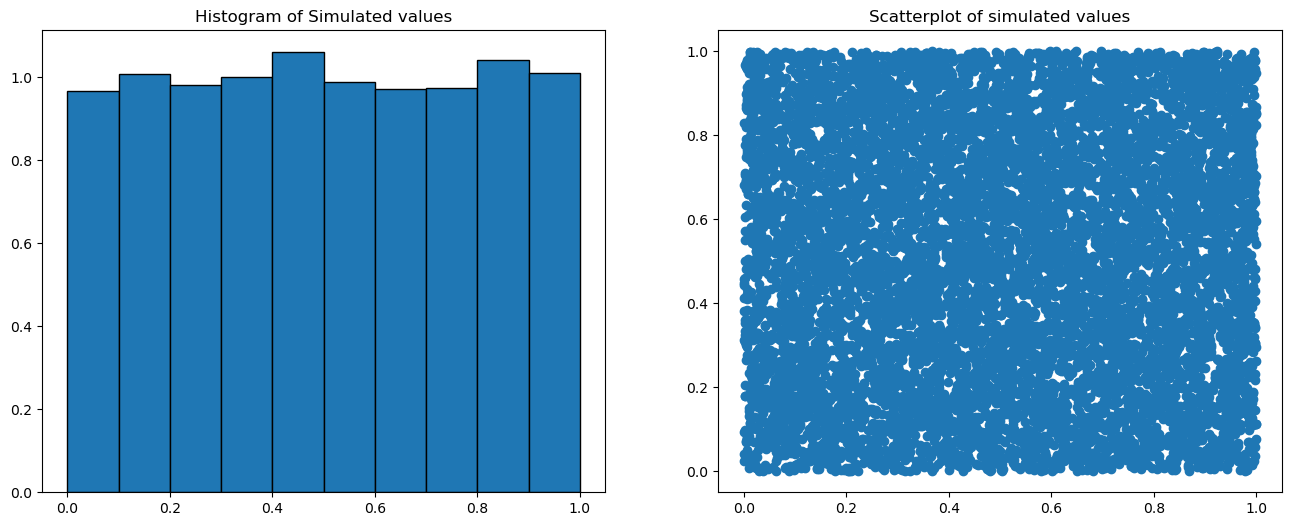

In [4]:
# IMplementation of linear congruential Generator
def LCG(x0, a,c,M,N):
    
    val = [((a*x0+c) % M)]

    for i in range(1,N):
        val.append( ((a*val[i-1]+c) % M) )

    return np.array(val)/M

randNum = LCG(3506,51234,1135,160000000,10000)

realNum = [random.uniform(0, 1) for i in range(10000)]

figure, axis = plt.subplots(1, 2,figsize=(16, 6)) 
axis[0].hist(randNum,10,density=True, edgecolor='black')
axis[0].set_title('Histogram of Simulated values')
axis[1].scatter(randNum,realNum)
axis[1].set_title('Scatterplot of simulated values')
plt.show()


## Evaluate Generator

In [5]:
# Chi-Square Test
def chi2_test(random_numbers, bins=10):
    expected_counts = len(random_numbers) / bins
    observed_counts, _ = np.histogram(random_numbers, bins=bins)
    chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
    p_value = chi2.sf(chi2_stat, df=bins-1)
    critical_value = chi2.ppf(1 - 0.05, bins-1)
    return chi2_stat, p_value, critical_value

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(random_numbers):
    ks_stat, p_value = kstest(random_numbers, 'uniform')
    return ks_stat, p_value

# Above/Below Runs Test
def run_test_1(random_numbers):
    # above/below
    median = np.median(random_numbers)
    runs = np.sum(np.diff(np.sign(random_numbers - median)) != 0) + 1
    n = len(random_numbers)
    expected_runs = (2 * n - 1) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Up/Down Runs Test
def run_test_2(random_numbers):
    # up/down
    runs = np.sum(np.diff(np.sign(np.diff(random_numbers))) != 0) + 1
    n = len(random_numbers)
    expected_runs = (2 * n - 4) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Up-and-Down Runs Test
def run_test_3(random_numbers):
    # up_and_down 
    n = len(random_numbers)
    signs = np.sign(np.diff(random_numbers))
    runs = np.sum(np.diff(signs) != 0) + 1
    expected_runs = (2 * n - 4) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

def correlation_test(random_numbers):
    return np.corrcoef(random_numbers[:-1], random_numbers[1:])[0, 1]




## 1b + 1c

In [6]:
params = [
    (10_000, 12345, 1103515245, 12345, 2**31),
    (10_000, 12345, 214013, 2531011, 2**32),
    (10_000, 12345, 1664525, 1013904223, 2**32),
    (10_000, 12345, 1, 0, 2**32),
    (10_000, 96734, 1664525, 1013904223, 2**32)
]

for n, seed, a, b, M in params:
    random_numbers = LCG(seed, a,b,M,n)
    print(f"Evaluating LCG with a={a}, b={b}, M={M}")
    chi,_, crit_val= chi2_test(random_numbers)
    ks,_ = kolmogorov_smirnov_test(random_numbers)
    rt1,_ = run_test_1(random_numbers)
    rt2,_ = run_test_2(random_numbers)
    rt3,_ = run_test_3(random_numbers)
    corr = correlation_test(random_numbers)
    print(np.round(chi,2),'       ',np.round(crit_val,2),'       ',np.round(ks,2),'      ',np.round(rt1,2),'      ',np.round(rt2,2),'     ',np.round(rt3,2),'     ',np.round(corr,2))
    print(' ')

    

Evaluating LCG with a=1103515245, b=12345, M=2147483648
6.54         16.92         0.01        -37.7        1.06       1.06       -0.0
 
Evaluating LCG with a=214013, b=2531011, M=4294967296
5.76         16.92         0.01        -39.79        0.18       0.18       0.01
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
14.26         16.92         0.01        -37.01        1.06       1.06       -0.02
 
Evaluating LCG with a=1, b=0, M=4294967296
90000.0         16.92         1.0        -158.1        -158.07       -158.07       nan
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
6.28         16.92         0.01        -39.88        0.21       0.21       0.01
 


/Users/frederiknagel/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


## Apply System available generator

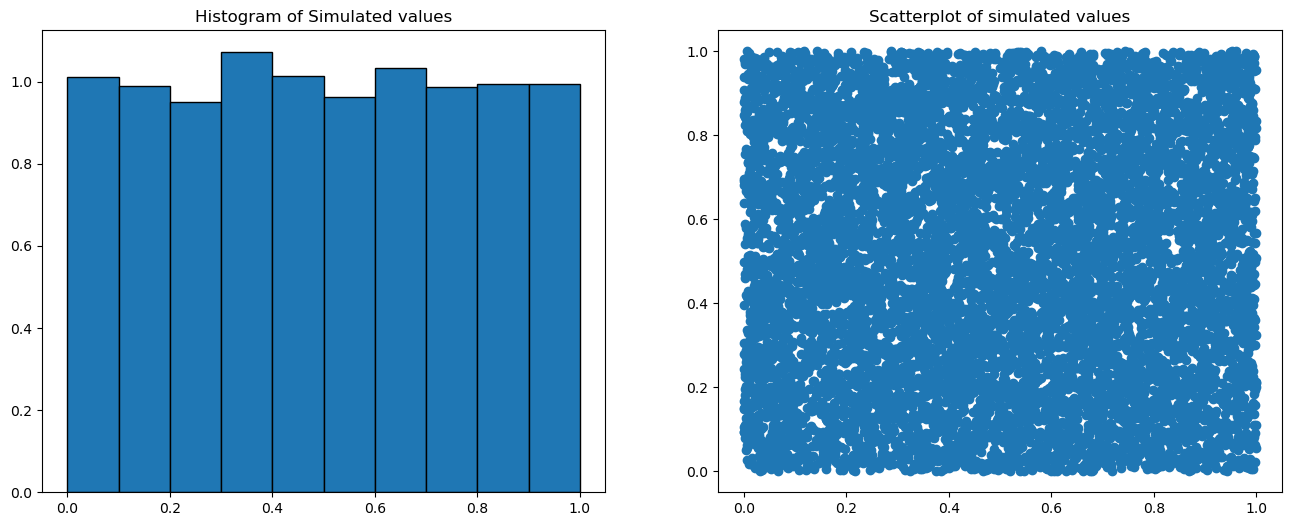

Evaluating LCG with a=1103515245, b=12345, M=2147483648
6.06    0.01    -38.17    1.49    1.49    -0.01
 
Evaluating LCG with a=214013, b=2531011, M=4294967296
12.05    0.01    -39.03    0.87    0.87    0.0
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
4.14    0.01    -40.26    -2.28    -2.28    0.02
 
Evaluating LCG with a=1, b=0, M=4294967296
3.2    0.01    -40.09    -1.08    -1.08    -0.0
 
Evaluating LCG with a=1664525, b=1013904223, M=4294967296
16.38    0.01    -38.36    0.63    0.63    -0.01
 


In [5]:
rng = np.random.default_rng()
random_numbers = rng.random(n)

figure, axis = plt.subplots(1, 2,figsize=(16, 6)) 
axis[0].hist(random_numbers,10,density=True, edgecolor='black')
axis[0].set_title('Histogram of Simulated values')
axis[1].scatter(random_numbers,realNum)
axis[1].set_title('Scatterplot of simulated values')
plt.show()

for n, seed, a, b, M in params:
    rng = np.random.default_rng()
    random_numbers = rng.random(n)
    print(f"Evaluating LCG with a={a}, b={b}, M={M}")
    chi,_ = chi2_test(random_numbers)
    ks,_ = kolmogorov_smirnov_test(random_numbers)
    rt1,_ = run_test_1(random_numbers)
    rt2,_ = run_test_2(random_numbers)
    rt3,_ = run_test_3(random_numbers)
    corr = correlation_test(random_numbers)
    print(np.round(chi,2),'  ',np.round(ks,2),'  ',np.round(rt1,2),'  ',np.round(rt2,2),'  ',np.round(rt3,2),'  ',np.round(corr,2))
    print(' ')

In [124]:
# Assignment 3 
# we could do multiple simulations with different initial starting points and check average 

a = [5390,93648,1920,400,30000,84001]
c = [4563,235346,4235,76,23,56573]
M = [160000000, 320000000, 6891736428, 4562939575, 909283617, 123456789]
seed = [10,3506,20000, 45,872,900]

for i in range(len(a)):
    for j in range(len(seed)):
        critval = []
        ks = []
        z = []
        R = []

        randNum = LCG(seed[j],a[i],c[i],M[i],10000)
        
        realNum = [random.uniform(0, 1) for i in range(10000)]

        hist_rand, bin_edges_rand = numpy.histogram(randNum, 
                                            bins = np.arange(0, 1.1, 0.1).tolist()) 

        hist_real, bin_edges_real = numpy.histogram(realNum, 
                                            bins = np.arange(0, 1.1, 0.1).tolist()) 

        critical_value, p_value = chisquare(hist_rand,hist_real)
        ks_stat,p_value = ks_uni(randNum)

        l_median= np.median(randNum)
        
        Z = abs(runsTest(randNum, l_median)) 
        
        r = round(pearsonr(randNum, realNum)[0], 4)
        critval.append(critical_value)
        ks.append(ks_stat)
        z.append(Z)
        R.append(r)
    print(np.mean(critval),'     ',np.mean(ks),'       ',np.mean(z),'        ',np.mean(R))
    








16.918977604620448       0.57120708125         95.73531088292297          0.0156
16.918977604620448       0.011315956249999981         99.98499987498124          -0.0049


KeyboardInterrupt: 